<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab04_penalized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 - Penalized Regression

### Author: Szymon Nowakowski


# Introduction to Penalization Methods
-----------------------

In many statistical and machine learning problems, overfitting arises when the model learns noise instead of the underlying patterns in the data. Penalization methods address this issue by adding a penalty term to the objective function, discouraging overly complex models. This results in solutions that are simpler and generalize better to unseen data. The rationale for penalization methods lies in controlling the complexity of the model to balance the trade-off between bias and variance. Penalization is also key in feature selection and regularization, where the goal is to identify relevant predictors while mitigating multicollinearity and stabilizing parameter estimates.

## The $\ell_0$ Penalty: Variable Selection

The penalized objective function for $\ell_0$ regression is:

$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_0,
$$

The $\ell_0$ penalty is defined as the count of non-zero coefficients in the regression model:
$$
\|\beta\|_0 = \sum_{j=1}^p \mathbb{1}(\beta_j \neq 0),
$$
where $\beta_j$ is the $j$-th coefficient, and $\mathbb{1}(\cdot)$ is the indicator function and $\lambda > 0$ controls the penalty strength.
The $\ell_0$ penalty directly enforces sparsity by minimizing the number of non-zero coefficients, effectively performing variable selection. However, the $\ell_0$ problem is computationally intractable because it requires solving a combinatorial optimization problem, which is NP-hard. For this reason, alternatives like $\ell_1$ penalization are commonly used.

Still,
$\ell_0$-based variable selection remains a **conceptual benchmark**: it precisely encodes the goal of picking as few features as possible while minimizing the residual sum of squares.





## The $\ell_1$ Penalty: Lasso
The Lasso (Least Absolute Shrinkage and Selection Operator) method uses the $\ell_1$ norm as the penalty term.

The penalized objective function for Lasso regression is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_1,
$$
with
$$
\|\beta\|_1 = \sum_{j=1}^p |\beta_j|.
$$
where $\lambda > 0$ controls the penalty strength. The $\ell_1$ penalty induces sparsity by shrinking some coefficients exactly to zero, making it effective for variable selection in high-dimensional settings.


## The $\ell_2$ Penalty: Ridge Regression
Ridge regression uses the $\ell_2$ norm as the penalty:
$$
\|\beta\|_2^2 = \sum_{j=1}^p \beta_j^2.
$$
The penalized objective function for ridge regression is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2.
$$ with $\lambda > 0$ controlling the penalty strength.

Unlike Lasso, ridge regression does not induce sparsity but shrinks all coefficients toward zero, making it effective for handling multicollinearity and stabilizing the model when predictors are highly correlated.



## Manifold Perspective for Lasso and Ridge

Both the Lasso and Ridge regression objectives can be interpreted as optimizing the unpenalized sum of squares subject to a constraint (a “manifold”) determined by the penalty. This constrained problem can be solved using the method of Lagrange multipliers, which connects the penalized and constrained formulations. The key difference lies in the shape of the constraint region and how it interacts with the **level curves** (contours) of the unpenalized sum of squares.


### Ridge Regression

For Ridge regression, the penalized objective is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2.
$$
Alternatively, it can be written as a constrained optimization problem:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 \quad \text{subject to} \quad \|\beta\|_2^2 \leq c,
$$
where $c$ is the radius of an $\ell_2$ ball.

The Lagrange multiplier $\lambda$ controls the strength of the penalty and relates to $c$ as follows:
- $\lambda$ determines how tightly the solution is constrained.
- Increasing $\lambda$ corresponds to decreasing $c$, shrinking the radius of the feasible region.

In Ridge regression, the feasible region $\{\beta : \|\beta\|_2^2 \leq c\}$ is a smooth sphere. The optimal solution occurs where the **level curves** (elliptical contours) of the unpenalized sum of squares first touch the sphere. Because the sphere is smooth, this contact rarely happens at a coordinate axis, so Ridge regression typically shrinks coefficients but does not force them to exactly zero.

### Lasso

For Lasso regression, the penalized objective is:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 + \lambda \|\beta\|_1.
$$
Alternatively, it can be written as:
$$
\min_\beta \frac{1}{2} \|y - X\beta\|_2^2 \quad \text{subject to} \quad \|\beta\|_1 \leq c,
$$
where $c$ is the radius of an $\ell_1$ ball.

The Lagrange multiplier $\lambda$ and the ball radius $c$ are related similarly to Ridge:
- $\lambda$ controls the strength of the penalty.
- Larger $\lambda$ corresponds to a smaller $c$, tightening the constraint.

For Lasso, the feasible region $\{\beta : \|\beta\|_1 \leq c\}$ is an $\ell_1$ ball, which is a polytope shaped like a diamond or octahedron. The sharp corners of the polytope (*pl. wielościan*) lie on coordinate axes. The solution occurs where the **level curves** of the unpenalized sum of squares first touch the polytope. Because the first contact often occurs at a corner, Lasso tends to shrink some coefficients exactly to zero, producing a sparse solution.



### Relationship Between $\lambda$ and $c$

In both Lasso and Ridge, $\lambda$ and $c$ are not equal but are related through the optimization problem. Specifically:
- $\lambda$ appears in the penalized formulation and determines the relative importance of the penalty term.
- $c$ defines the size of


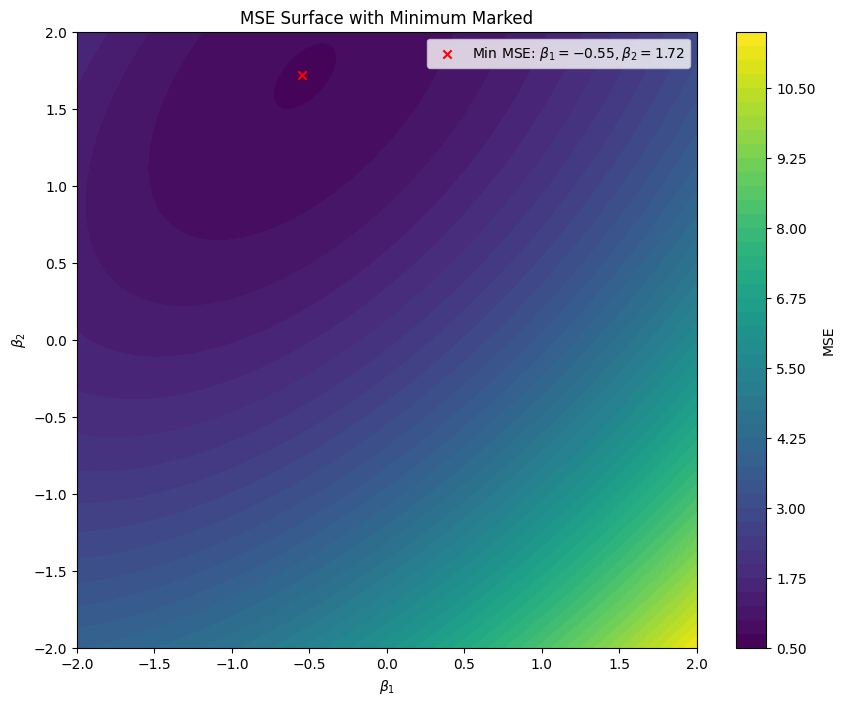

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fictional regression problem
def mse(beta_1, beta_2, X1, X2, y):
    """Calculate MSE for given beta_0, beta_1."""
    y_pred = beta_1 * X1 + beta_2 * X2
    return np.mean((y - y_pred) ** 2)

# Generate some synthetic data for the regression
np.random.seed(42)
X1 = np.random.uniform(-1, 1, 20)
X2 = np.random.uniform(-1, 1, 20)

true_beta_1 = -1.0
true_beta_2 = 1.0

y = true_beta_1 * X1 + true_beta_2 * X2 + np.random.normal(scale=1.0, size=len(X1))

# Create a grid of beta_0 and beta_1 values
beta_1_range = np.linspace(-2, 2, 100)
beta_2_range = np.linspace(-2, 2, 100)
beta_1_grid, beta_2_grid = np.meshgrid(beta_1_range, beta_2_range)

# Compute MSE values for the grid
mse_values = np.zeros_like(beta_1_grid)
for i in range(beta_1_grid.shape[0]):
    for j in range(beta_1_grid.shape[1]):
        mse_values[i, j] = mse(beta_1_grid[i, j], beta_2_grid[i, j], X1, X2, y)

# Find the minimum MSE and its location
min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_beta_1 = beta_1_grid[min_idx]
min_beta_2 = beta_2_grid[min_idx]

# Plot the MSE surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(beta_1_grid, beta_2_grid, mse_values, levels=50, cmap='viridis')
plt.colorbar(contour, label="MSE")

# Mark the minimum MSE location with a large X
plt.scatter(min_beta_1, min_beta_2, color='red', marker='x', label=rf"Min MSE: $\beta_1={min_beta_1:.2f}, \beta_2={min_beta_2:.2f}$")



# Add labels and legend
plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("MSE Surface with Minimum Marked")
plt.legend()
plt.show()


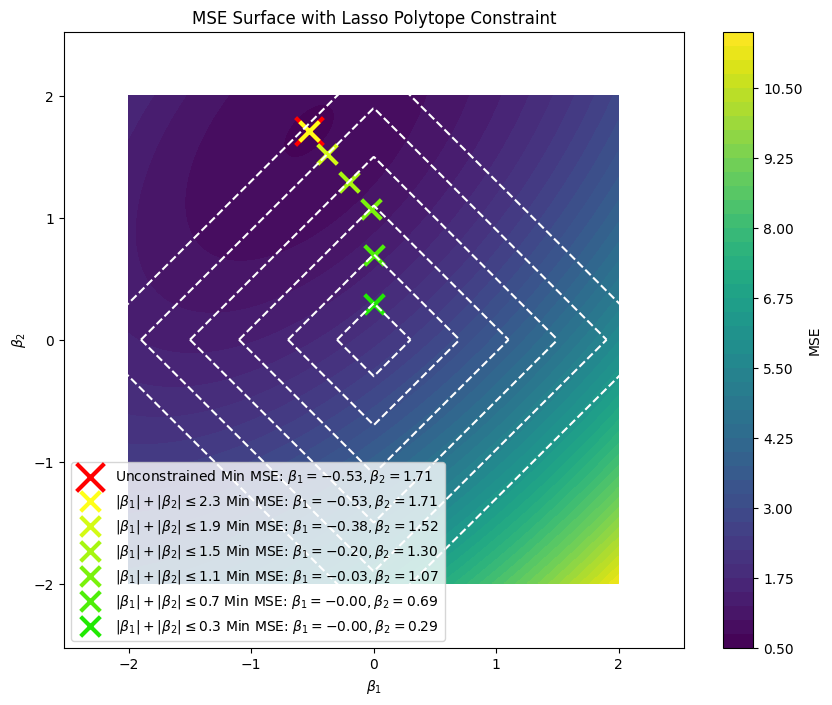

In [24]:
# Create a FINER grid of beta_0 and beta_1 values
beta_1_range = np.linspace(-2, 2, 1000)
beta_2_range = np.linspace(-2, 2, 1000)
beta_1_grid, beta_2_grid = np.meshgrid(beta_1_range, beta_2_range)

# Compute MSE values for the grid
mse_values = np.zeros_like(beta_1_grid)
for i in range(beta_1_grid.shape[0]):
    for j in range(beta_1_grid.shape[1]):
        mse_values[i, j] = mse(beta_1_grid[i, j], beta_2_grid[i, j], X1, X2, y)

# Find the minimum MSE and its location
min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_beta_1 = beta_1_grid[min_idx]
min_beta_2 = beta_2_grid[min_idx]

# Plot the MSE surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(beta_1_grid, beta_2_grid, mse_values, levels=50, cmap='viridis')
plt.colorbar(contour, label="MSE")

# Mark the minimum MSE location (unconstrained) with a red X
plt.scatter(min_beta_1, min_beta_2, color='red', marker='x', s=400, linewidths=3, label=rf"Unconstrained Min MSE: $\beta_1={min_beta_1:.2f}, \beta_2={min_beta_2:.2f}$")

max_c = 2.3

# color codes https://rgbcolorcode.com/
# Define the colors
electric_green = np.array([0, 230, 0])
laser_lemon = np.array([255, 255, 25])

for lasso_c in np.arange(max_c, 0, -0.4):
    # Compute the blended color (the colors span green-yellow range)
    col = laser_lemon * (lasso_c / max_c) + electric_green * (1 - lasso_c / max_c)
    # Normalize RGB values to [0, 1] for Matplotlib
    col = col / 255.0

    # Apply the Lasso constraint |β_1| + |β_2| <= c
    lasso_constraint = np.abs(beta_1_grid) + np.abs(beta_2_grid) <= lasso_c
    constrained_mse = np.where(lasso_constraint, mse_values, np.inf)
    constrained_min_idx = np.unravel_index(np.argmin(constrained_mse), mse_values.shape)
    constrained_min_beta_1 = beta_1_grid[constrained_min_idx]
    constrained_min_beta_2 = beta_2_grid[constrained_min_idx]


    # Mark the constrained minimum within the Lasso polytype with a violet X
    plt.scatter(constrained_min_beta_1, constrained_min_beta_2, color=col, marker='x', s=200, linewidths=3, label=rf"$| \beta_1 | + | \beta_2 | \leq {lasso_c:.1f}$ Min MSE: $\beta_1={constrained_min_beta_1:.2f}, \beta_2={constrained_min_beta_2:.2f}$")

    # Plot the Lasso polytopes (|β_1| + |β_2| = c)
    lasso_boundary = np.linspace(-lasso_c, lasso_c, 500)  # Boundary along the |β_1| axis

    # Top and bottom boundaries
    plt.plot(lasso_boundary, lasso_c - np.abs(lasso_boundary), color='white', linestyle='--')
    plt.plot(lasso_boundary, -lasso_c + np.abs(lasso_boundary), color='white', linestyle='--')

# Add labels and legend
plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("MSE Surface with Lasso Polytope Constraint")
plt.legend()
plt.show()


## Group Lasso
The **group Lasso** extends Lasso to encourage **groupwise sparsity**. Suppose the parameters $\beta$ are partitioned into groups $\{G_1, G_2, \dots\}$. Then we impose:

$$
\sum_{g} \|\beta_{G_g}\|_2
$$

as the penalty, where $\beta_{G_g}$ are the coefficients for group $g$. Minimizing:

$$
\sum_{i=1}^n \left(y_i - x_i^\top \beta\right)^2 + \lambda \sum_{g} \|\beta_{G_g}\|_2.
$$


The penalty $\sum_{g} \|\beta_{G_g}\|_2$ combines two behaviors:
1. **Between-group penalty**: The $\ell_1$-like behavior of the penalty $\|\beta_{G_g}\|_2$ enforces sparsity at the group level, meaning that entire groups of coefficients can be zeroed out if their contribution to the objective is small.
2. **Within-group penalty**: The $\ell_2$ norm within each group $\|\beta_{G_g}\|_2$ applies Ridge-like shrinkage, ensuring smooth and proportional coefficient shrinkage within a group.

If groups are irrelevant, the $\ell_1$ penalty zeros out all coefficients for those groups. For groups retained in the solution, the $\ell_2$ penalty prevents individual coefficients within the group from being arbitrarily zeroed out, providing a balance between group selection and regularization.

Concrete examples include selecting entire subsets of correlated predictors in finance (grouping by sector) or picking all polynomial terms of a given variable together in polynomial expansions.

